- In the past, every input for a model would be mapped to a predetermined value
    - Kind of like a dictionary

- These days, software self-learns based on the set specifications

- The field of *machine learning* was defined by Arthur Samuel as "the field of study that gives computers the ability to learn without being **explicitly programmed**"

- Applications of ML:
    - Face recognition
    - Search engines
    - Spam filters
    - Recommendations (e.g. Spotify)

### Supervised learning

- We provide labeled examples to the algorithm
    - E.g. predicting the sale price of a home based on past sales data

### Unsupervised learning

- We provide data, but without the outcomes
    - E.g. trying to find a good way to group different clusters in a database
    
### Reinforcement learning

- Let the algo try to learn on its own, but let it react to its own errors
    - E.g. robot teaching itself to walk

- In data science, the most important technique is **supervised learning**
    - Given what we observed in the past, we want to be able to predict the likely outcome of a situation

- We call the outcome that we want to predict the **target variable**
    - The real value is labeled $y$
        - The predicted value is labeled $\hat{y}$

- The inputs to the model are called **predictive variables**
    - They are labeled $X$

- $n$ denotes the sample size (i.e. the number of observations), and $p$ denotes number of predictive variables in the model

- Therefore $y$ is a column vector of length $n$ and $X$ is an $n$x$p$ dimensional matrix

- When we think we've derived a good function to explain the transformation from $X$ to $y$, we call this function a **hypothesis**

- We can never be 100% confident about the full range of associations between $X$ and $y$

- Reasons:
    1. We're looking at a sample of the data, meaning that if we have some **sampling bias**, our model will include this bias
    2. Maybe an event has never happened before, so **no matter how good our data is, we'll never know that it's possible**

- There's not much we can do for reason 2
    - We can **fix the first reason by taking bigger samples**

### Batches

- The large samples of historical data that we use to train the model

- Sometimes, we trim the data ahead of the model training so it's more representative of the environment in which we're making our predictions
    - This is called **active learning**

- We don't always know which predictive variables to use
    - We can loop through the different combinations in our dataset to figure out the right predictors

- Typically, more data is better
    - More varibles to choose from

- We classify our predictive variables as either:
    1. Physical measurements
    2. Human measurements

### Physical measurements

- Always good since they're naturally numerical

#### Two types

1. Interval variables
    - has **arbitrary zero**
        - E.g. Temperature in celsius
            - 0 degrees C is not the lowest the value can go

2. Ratio variables
    - has **natural zero**

### Human measurements

- Not ideal
- Can be converted into **rank values**

#### Oridinal variables

- No natural zero
    - The space between values is not consistent
    
- E.g. consider the ordinal values {bad, average, good}
    - We assign bad = 1, average = 2, good = 3
        - **Is the distance (i.e. difference in quality) between 1 and 2 the same as between 2 and 3?**

- Both physical measurements and human measurements are classified as **quantitative measurements**

### Important data questions

1. Is the **quality** of the data good?
2. Is the **quantity** of the data sufficient?
3. Is the **time period** of the data appropriate?

____

### Response variables

- Two types:
    1. Quantitative variable
        - E.g. Height of son based on height of father
        - This is a *regression problem*
    2. Qualitative variable
        - E.g. Will a student be accepted to a prestigious university
        - This is a *classification problem*

#### Biggest problems for response variables

1. Measurement errors in the data
2. Biases in the data

- Won't accurately predict future outcomes

____

### The family of linear models

- Called a linear model since **the response variable can be expressed as a linear combination of the predictive variables**

- The family of linear models is called the **Generalized Linear Model**

- These models are used to solve the **two most basic problems in data science:**
    1. Regression
    2. Classification

#### Simple linear regression

- Most basic of the GLMs

### $\hat{y} = \beta_{0} + \beta_{1}X_{1}$

_____

## Datasets

### 1. *Hedonic Housing Prices and the Demand for Clean Air*

- 506 census tracts of Boston from the 1970 census
- 21 predictive variables
- Target variable is the median monetary value of the houses

### 2. *1990 US Census Data*

- 20,640 observations from the 1990 US Census
    - Each observation represents a block group
        - This is a group of 1,425 individuals living in a geographically compact area
- 9 predictive variables
- Target variable is the log of the median house value

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats.stats import pearsonr
from sklearn.datasets import load_boston

In [86]:
plt.rcParams['figure.figsize'] = 10, 10

In [87]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['Target'] = boston.target

**Persisting the data**

In [88]:
df.to_csv('data/housing.csv')

## We can calculate the mean, then calculate the squared error of each row's target value from the mean

In [89]:
target_mean = df['Target'].mean()
target_mean

22.532806324110698

In [90]:
se_array = (df['Target']-target_mean)**2

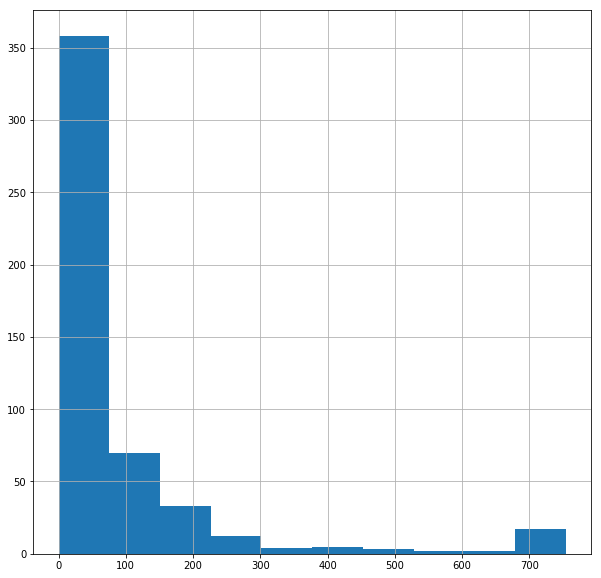

In [91]:
se_array.hist()

### We can see from this plot that most `MEDV` values are close to the mean

### We know intuitively that a bigger house is more expensive

### Let's look into the correlation between house size and our target variable

## First, we consider Covariance:

# $Cov(X,Y) = E[XY]-E[X]E[Y] = \frac{\sum(x-\bar{x})(y-\bar{y})}{n}$

## From the Covariance, we can derive the Correlation as:

# $Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_{X}\sigma_{Y}}$

### We can calculate the correlation between `RM` and `MEDV` a couple ways

**First way**

In [92]:
E_X, sigma_X = df['RM'].mean(), df['RM'].std()
E_Y, sigma_Y = df['Target'].mean(), df['Target'].std()
E_XY = (df['RM']*df['Target']).mean()

covariance = E_XY - E_X*E_Y
correlation = covariance/(sigma_X*sigma_Y)
correlation

0.6939857179270819

**Second way**

In [93]:
covariance = ((df['RM'] - E_X)*(df['Target'] - E_Y)).mean()
correlation = covariance/(sigma_X*sigma_Y)
correlation

0.6939857179271289

**Third way**

In [94]:
df[['RM','Target']].corr()

,RM,Target
RM,1.00000,0.69536
Target,0.69536,1.00000


**Fourth way**

In [95]:
pearsonr(df['RM'], df['Target'])

(0.6953599470715393, 2.487228871008295e-74)

## We can see how `RM` compares to the target variable using a scatter plot

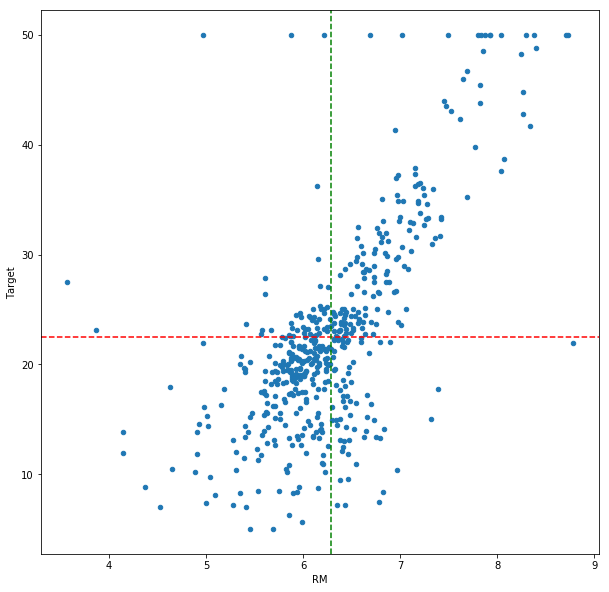

In [96]:
df.plot.scatter(x = 'RM', y = 'Target')
plt.axhline(df['Target'].mean(), ls = 'dashed', color = 'r')
plt.axvline(df['RM'].mean(), ls = 'dashed', color = 'g')

### The dotted lines split the chart into 4 quadrants

## This shows why our correlation value was so high - the majority of the points are in the top right and bottom left quadrants

### If correlation was equal to one, all points would lie along a diagonal line

### This means that a linear increase in the value of the predictor variable leads to a linear increase in the target variable

## In other words, correlation is a measurement of the *linear* relationship between two variables

______

# Extending to linear regression

### By fitting a linear regression to the data, we derive the line through the data that's as close as possible to all the points

### To define the line of best fit, we'll need an intercept denoted $\beta_{0}$ and a slope $\beta_{1}$

In [97]:
import statsmodels.api as sm

In [98]:
y = df['Target']
X = df['RM']
#need to add a constant for the intercept
X = sm.add_constant(X)

In [99]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [100]:
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()

In [101]:
fitted_model.params

const   -34.670621
RM        9.102109
dtype: float64

## From this, we can see that our model is defined as:

# $\left (\text{Estimated Target Value} \right ) = -34.671 + 9.10211\left (\text{RM Value} \right )$

## In other words, $\beta_{0}=-34.670621$ and $\beta_{1} = 9.102109$

### Now, we look at the summary of our model

In [102]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 31 Jul 2018   Prob (F-statistic):           2.49e-74
Time:                        17:10:43   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

____

# Glossary

## *Table 1*

### Dep. Variable

- This tells us what we set as the target variable
    - i.e. the value we're trying to predict
    
### Model

- This tells us the type of model that we have fitted

### Method

- This tells us the way the parameters were fitted

### No. Observations

- This tells us the number of observations used in the calculation

### DF Residuals

- This tells us the degrees of freedom for the residuals
    - **Note**: residuals means the difference between the predicted value and the actual value
        - i.e. the distance between the point and the line
        
- **This is calculated as:** $\left (\text{No. Observations} \right ) - \left ( \text{Number of Parameters} \right )$
    - Since we have the coefficient and RM, we have two parameters
        
### DF Model

- The number of **non-intercept** parameters that the model is estimating

## *Table 2*

### R-squared

- This is the **coefficient of determination**
    - It tells us the predictive power of the model
- The idea is that it tells us how much of the variability is accounted for
    - Therefore, since our R-squared value is less than 0.5, our model explains less than half of what's going on
    
### Adj. R-squared

- This is just another version of the R-squared value that accounts for:
    1. The number of parameters
    2. The number of observations
    
### F-statistic

- This tells us how much better our model is than just predicting that the Target it equal to its mean

### Prob (F-statistic)

- This tells us the likelihood of randomly getting the F-statistic that we got
    - This is like the p-value for hypothesis testing
    
    
### AIC

- This is the *Alkaline Information Criterion* which tells us how complicated our model is

- The lower the AIC score, the better (since we always prefer simpler models)

- This metric comes in handy when comparing different models

### BIC

- This is the *Bayesian Information Criterion* which is similar to the AIC
    - **Difference**: higher penalty for too many parameters

## Many of these terms make more sense for a multiple regression

## For the simple linear regression, we'll focus on the R-squared and F-statistic values

- This F-statistic isn't super helpful if:
    1. We have enough observations
    2. We know our predictor variable and target variable are correlated

- Our Target variable has a wide variety of possible values
    - The R-squared statistic tells us how much of the difference between two Target values is explained by their different predictor values
    
- E.g. if one house is worth twice as much as another, 49% of that difference is probably explained by the fact that the second house is three times the size

# The R-squared statistic is calculated as:

# $R^{2} = 1-\frac{SSE_{Regression}}{SSE_{Total}}$

## Earlier, we calculated the $SSE_{Total}$ value

In [103]:
SSE_total = se_array.sum()
SSE_total

42716.29541501976

## To calculate the $SSE_{Regression}$ value, we take the difference between the observed value and the predicted value

In [104]:
predicted_array = -34.670621+df['RM']*9.102109
se_regression_array = (predicted_array-df['Target'])**2
SSE_regression = se_regression_array.sum()
SSE_regression

22061.8791962118

In [105]:
R_squared = 1-SSE_regression/SSE_total
R_squared

0.483525455991334

## We can also calculate the R-squared value as the square of the correlation between the variables

In [106]:
(pearsonr(df['RM'], df['Target']))[0]**2

0.4835254559913339

### If you reduce the R-squared value to 0, you can explain all the variance in the target variable

## *Table 3*

### coef

- The estimated beta values for the model

### std err

- The standard errors for each beta value
    - This tells us how confident we are in our estimates
        - The smaller the better

### t

- The t-statistic for the betas
    - Tells us how sure we are that the values aren't zero
    
### P > |t|

- The p-value for the t-statistics

### [95% Conf. Interval]

- The upper and lower bounds for the 95% confidence interval around the betas

- For a data science persective, we care more about whether or not our regression is working that what the t-statistic is
    - We focus mostly on:
        1. The coef values
        2. The std err values

___

### So, in the coef column of our simple regression, we had:

### `const  = -34.6706`

### `RM  = 9.1021`

### This means that we can express our target variable i.e. the price of the home as:

$$
\hat{y} = -34.6706 + 9.1021\cdot RM
$$

- We can see that if we increase the predictor variable by 1, the target variable will increase by 9.1021

- Also, we note that if $RM$ is equal to 1 or 2, our $\hat{y}$ value will be -25.57 or -16.4664
    - **But how can we have negative home prices?**

- Clearly, this is not possible, but **the reason our model has this property is because of the data it was trained on**

In [107]:
df[['RM']].describe()

,RM
count,506.000000
mean,6.284634
std,0.702617
min,3.561000
25%,5.885500
50%,6.208500
75%,6.623500
max,8.780000


- As we can see, the smallest $RM$ value in the training data was 3.561 and the largest was 8.78

- When we try to predict for a value that was outside the training set, we can get wacky results
    - The model learns from what it sees

#### Interpolation

- Using the model to predict from a value **inside** the training set

#### Extrapolation

- Using the model to predict from a value **outside** the training set

### The standard error value tells us a lot about how strong the relationship is between the predictor and the target

- We calculate the ratio

$$
\frac{std.err_{i}}{\beta_{i}}
$$

- If this value is **greater than 0.5**, we know that the relationship **is weak**

- The best way to reduce the standard error is to take a **bigger sample** i.e. train the model on more observations
    - There are other ways too (e.g. removing redundant variables, etc.) that'll be discussed later

______

## *Table 4*

- Now we finally look at the analysis of the residuals

### Omnibus

- This test combines **skewness** and **kurtosis** (described below)

### Prob(Omnibus)

- This is essentially a p-value for the observed Omnibus metric

### Skew

- This measures how **asymmetrical** the distribution of residuals are around the mean
    - We want the skew to be zero
        - If the skew is positive, it means that the data has a long right tail
        - If the skew is negative, a long left tail
        
### Kurtosis

- This measure how *normal* the residuals are
    - A **positive** kurtosis means that the distribution of errors is *pointy*
    - A **positive** kurtosis means that the distribution of errors is *rounder*
    
### Durbin-Watson

- This measure tells us whether residuals are correlated
    - i.e. if residuals get bigger or smaller over time
    
### Jarque-Berra (JB)

- Like the Omnibus measure, this measure combines skewness and kurtosis

### Prob(JB)

- This gives the p-value for the JB statistic

### Cond. No.

- This measure tests for multicollinearity
    - This measure isn't relevant wihen we only have one predictor

_______

## *Who cares about the residuals?*

- It's important to study the residuals from our model to **check if there's something fishy with the data**

- If the model is a good predictor, then the discrepancies between model predictions and the observed values (i.e. where the model thinks the target should be vs. where it actually was) **should be random**
    - ***But what if they're not random?***
        - Then that means there is some trend in the residuals
            - This could mean that the model is getting worse (or better) as the predictor increases

## *What to look for when analyzing the residuals?*

### 1. Values that are too far from the average

- This suggests that the model isn't great at predicting the target variable
    - Removing a small chunk of the data may lead to a drastically different model

- We'll give an example of this for an arbitrary model below

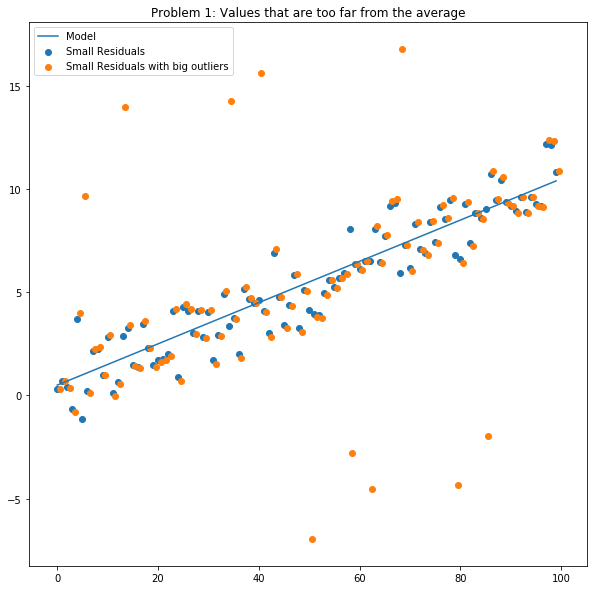

In [108]:
x = np.arange(100)
y = 0.5 + 0.1*x
residuals1 = np.random.normal(loc = 0, scale = 1, size = x.size)
noise = np.random.choice((x.size-10)*[0]+5*[10]+5*[-10], size = x.size, replace = False)
residuals2 = 1.1*(residuals1 + noise)

plt.plot(x, y, label = 'Model')
plt.scatter(x, y+residuals1, label = 'Small Residuals')
plt.scatter(x+0.5, y+residuals2, label = 'Small Residuals with big outliers')
plt.title('Problem 1: Values that are too far from the average')
plt.legend()
plt.show()

- As we can see from the chart above, the model is far more accurate for the Small Residuals than the Large Residuals

### 2. Increasing/decreasing residuals

- If the residuals show a trend vs. the predictor varaible, then we know that the model is not working properly

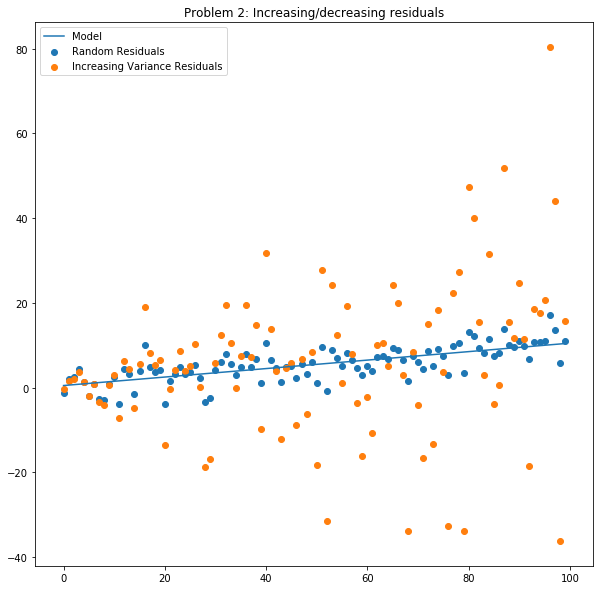

In [109]:
x = np.arange(100)
y = 0.5 + 0.1*x
residuals1 = np.random.normal(loc = 0, scale = 3, size = x.size)
residuals2 = residuals1*y

plt.plot(x, y, label = 'Model')
plt.scatter(x, y+residuals1, label = 'Random Residuals')
plt.scatter(x, y+residuals2, label = 'Increasing Variance Residuals')
plt.title('Problem 2: Increasing/decreasing residuals')
plt.legend()
plt.show()

- As we can see on the chart above, the residuals flare outwards like a trumpet

### 3. Strange shapes in residual clouds

- If there are weird clusters in the residuals, it usually means that the model doesn't include enough predictor variables to accurately model the target's behaviour

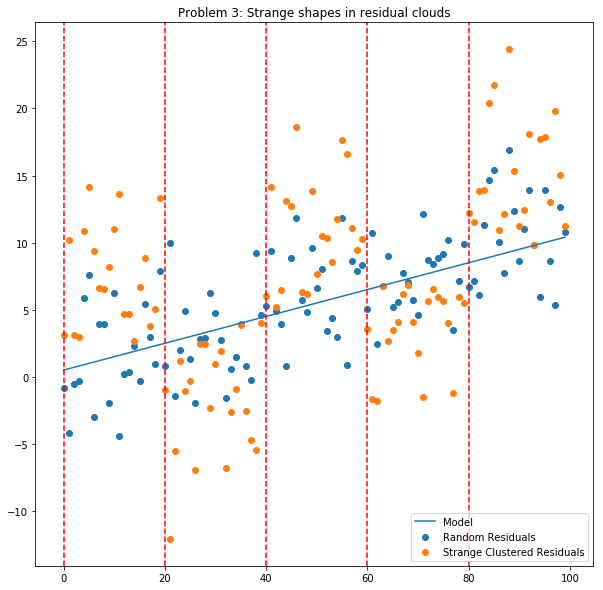

In [110]:
x = np.arange(100)
y = 0.5 + 0.1*x
residuals1 = np.random.normal(loc = 0, scale = 3, size = x.size)
residuals2 = 2*np.abs(residuals1)*((-1)**(x//20))

plt.plot(x, y, label = 'Model')
plt.scatter(x, y+residuals1, label = 'Random Residuals')
plt.scatter(x, y+residuals2, label = 'Strange Clustered Residuals')
plt.title('Problem 3: Strange shapes in residual clouds')

for x in np.arange(5):
    plt.axvline(x*20, c = 'r', ls = 'dashed')

plt.legend()
plt.show()

- As we can see from the chart above, the clustered residuals seem to flip signs periodically
    - I.e. notice that all the points between the dashed red lines are on the same side of the blue trend line

_____

## Let's look at the residuals for the model we've built

In [111]:
predicted_values = fitted_model.params['const'] + fitted_model.params['RM']*df['RM']
residuals = df['Target'] - predicted_values
normalized_residuals = (residuals - residuals.mean())/residuals.std()

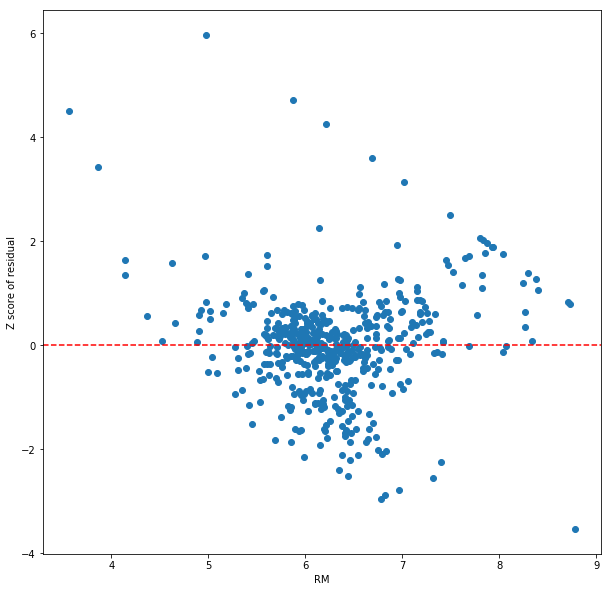

In [112]:
plt.scatter(df['RM'].values, normalized_residuals.values)
plt.axhline(0, ls = 'dashed', c = 'r')
plt.xlabel('RM')
plt.ylabel('Z score of residual')
plt.show()

## *Which problems does our chart show?*

#### There are some pretty extreme outliers

- Some of the values are more than 4 standard deviations away
    - These outliers are likely having a big impact on our model
    
#### The residuals don't look random

- Between 5-7, the variance is much smaller than outside the range

_______

# Correlation is not causation

## Types of Causation

### 1. Direct Causation

- This is when we know that **x causes y**
    - E.g. the size of a home *causes* the home to be more valuable
    
### 2. Reciprocal Effects

- This is when **x causes y, but x is also influenced by y**
    - E.g. A high crime rate in the neighborhood of a home can decrease its value, but it's also unlikely that a neighborhood with high priced homes will have a high crime rate
        - Therefore, higher crime rates cause house prices to be lower, but *high house prices also limits (thus influences) how high the crime rate can get in a neighborhood*
        - Similarly, crime rates increase, then housing prices may decrease leading to a further increase in crime
            - This is a sort of **feedback loop**

### 3. Spurious Causation

- This is when **it looks like x causes y, but in reality some other variable z causes both x and y**
    - E.g. it may look like *having many art galleries and nice restaurants cause house prices to increase, when the reality is that affluent residents cause an increase in both art galleries and nice restaurants, as well as housing prices*
    
![](images/spurious_correlation.png)

### 4. Indirect Causation

- This is when **it looks like x causes y, but in reality x causes some other variable z, which then causes y**
    - E.g. a government decides to increase the tax rate to invest in local infrastructure
        - When the project is completed, neighborhoods with improved infrastructure see an increase in housing prices
            - Therefore, *increased tax rates indirectly caused housing prices to increase*
    
![](images/indirect_causation.PNG)

### 5. Conditional Effect

- This is when **x causes y, but only is specific conditions**
    - Also known as **situation interaction**
    - E.g. if the crime rate in a neighborhood is low, then more schools increases housing prices
        - If the crime rate is high, the number of schools doesn't really affect housing prices
            - Therefore, *the number of schools causes housing prices to increase, conditional on crime rates being low*

### 6. Random Effect

- This is when **any correlation calculated from the data is a MISTAKE**
    - E.g. see chart below
    
![](images/chart.png)

- Obviously, the best case scenario is when the variables have a direct causation relationship
    - Usually not the case, however

- Reciprocal effects are **most common for econometric models**
    - Often requires special types of regression analysis
    - These variables should be left in the analysis
    
- Spurious and indirect causes will add noise to the model
    - The best solution is usually to take a larger sample size

- Conditional effects, when not controlled for, can limit a model's predictive power
    - There are ways to automate the data check process for these effects
    
- Random effects are the worst thing for model accuracy, but they are easily avoided using processes described in later chapters

______

# Predicting with the regression model

- Above, we predicted the housing prices using the code:

### `predicted_values = fitted_model.params['const'] + fitted_model.params['RM']*df['RM']`

- Alternatively, we could have used

### `intercept_array = np.ones(len(df))`

### `RM_array = df['RM'].values`

### `value_array = np.stack([intercept_array, RM_array], axis = 1)`

### `predicted_array = fitted_model.predict(value_array)`

In [113]:
intercept_array = np.ones(len(df))
RM_array = df['RM'].values
value_array = np.stack([coefficient_array, RM_array], axis = 1)
predicted_array = fitted_model.predict(value_array)

- To show that these are the same...

In [114]:
(predicted_values - predicted_array).sum()

0.0

____

# Regressing with scikit-learn

- Instead of using statsmodels, we can use scikit-learn for our regression

In [115]:
from sklearn import linear_model

In [116]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [117]:
linear_regression.fit(df['RM'].values[:, np.newaxis], df['Target'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
linear_regression.coef_, linear_regression.intercept_

(array([9.10210898]), -34.67062077643857)

- **As we can see, the beta and intercept values are the same as those calculated using statsmodels**

In [119]:
fitted_model.params

const   -34.670621
RM        9.102109
dtype: float64

______

# Minimizing the cost function

- The magic of regression is in finding the perfect line to slice through the cloud of dots
    - **We want to find the line that minimizes the squared error**

- If we have two points, the best fitting line simple connects the two points

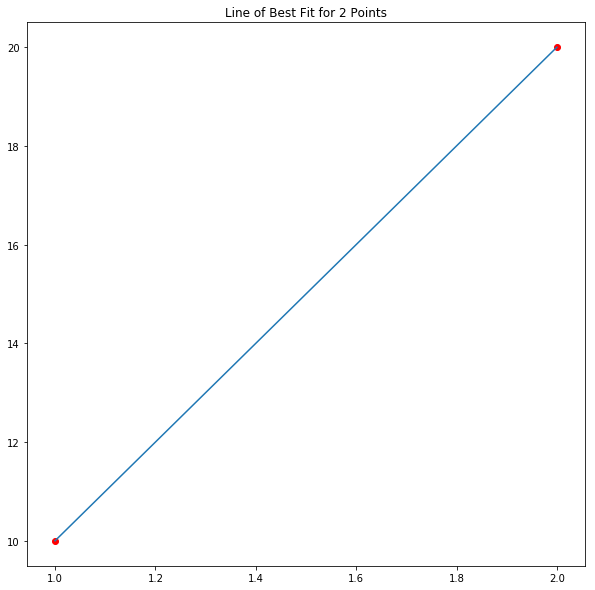

In [120]:
point1_x, point1_y = 1, 10
point2_x, point2_y = 2, 20
plt.scatter([point1_x, point2_x], [point1_y, point2_y], color = 'r')
plt.plot([point1_x, point2_x], [point1_y, point2_y])
plt.title('Line of Best Fit for 2 Points')
plt.show()

- If we have three points (that aren't connected by a single line), the calculation becomes more complicated

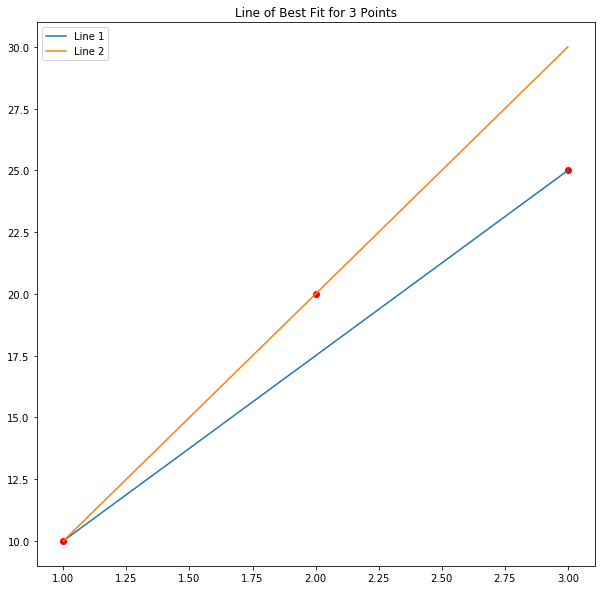

In [124]:
point1_x, point1_y = 1, 10
point2_x, point2_y = 2, 20
point3_x, point3_y = 3, 25
plt.scatter([point1_x, point2_x, point3_x], [point1_y, point2_y, point3_y], color = 'r')

plt.plot([point1_x, point3_x], [point1_y, point3_y], label = 'Line 1')

x = np.arange(1,3.01, 0.01)

line2 = 10*x

plt.plot(x, line2, label = 'Line 2')

plt.title('Line of Best Fit for 3 Points')
plt.legend()
plt.show()

### Which of the two lines above is a better fit?

- We need to see which is closer be calculating the **mean squared error**


### Line 1

- This line is touching two of the points, so the only squared error will be between the line and the middle dot
    - The value for Line 1 at x=2 is 17.5
    
#### $MSE_1 = (20-17.5)^{2} = 2.5^{2} = 6.25$

### Line 2

- This line is also touching two of the points, so we calculate the MSE as:

### $MSE_2 = (30-25)^{2} = 5^{2} = 25$

### As we can see, Line 1 is the better fit

## What if we use the python package to find the line of best fit?

In [131]:
X = np.array([[point1_x], [point2_x], [point3_x]])
y = np.array([point1_y, point2_y, point3_y])

In [133]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
linear_regression.fit(X, y)
linear_regression.coef_, linear_regression.intercept_

(array([7.5]), 3.3333333333333375)

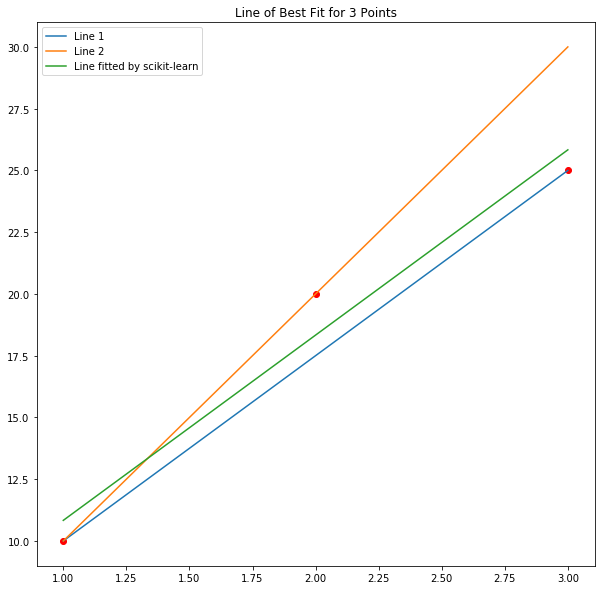

In [134]:
point1_x, point1_y = 1, 10
point2_x, point2_y = 2, 20
point3_x, point3_y = 3, 25
plt.scatter([point1_x, point2_x, point3_x], [point1_y, point2_y, point3_y], color = 'r')

plt.plot([point1_x, point3_x], [point1_y, point3_y], label = 'Line 1')

x = np.arange(1,3.01, 0.01)

line2 = 10*x

plt.plot(x, line2, label = 'Line 2')

line_of_best_fit = linear_regression.intercept_ + linear_regression.coef_[0]*x
plt.plot(x, line_of_best_fit, label = 'Line fitted by scikit-learn')

plt.title('Line of Best Fit for 3 Points')
plt.legend()
plt.show()

### The MSE for the line derived by the model is equal to:

## $MSE = (10.833 - 10)^{2} + (18.333 - 20)^{2} + (25.833 - 25)^{2} = 4.1667$

### So we can clearly see that it's a better fit

# Let's call our regression model $h$, which means that we feed $h$ values from $X$ to estimate values for $y$, so $h(X) = \hat{y} \approx y$

# Therefore, our cost function (i.e. the function to be minimized) looks something like

# $\frac{1}{n}\sum \left (h(x_{i}) - y_{i} \right )^{2}$

# As we can see, we're trying to minimize the mean squared error for the different observed values

### There are 3 standard methods for minimizing this function

#### 1. Pseudoinverse

#### 2. QR Factorization

#### 3. Gradient Descent

______

# Explaining the reason for using squared errors

### Why would we want to minimize the *squared error* instead of the *absolute error*?

- Without getting into the nitty gritty statistics, using the squared error places a bigger burden on large errors

#### Example

- Let's say the errors for one line is [1, -1, 1] which gives a mean *absolute* error of 1 and a mean *squared* error of 1

- If another line has errors [0, 3, 0], its mean *absolute* error is also 1, but its mean *squared* error is 3

- **If we used mean *absolute* error, our two lines would be equivalent**
    - Using mean *squared* error, our second line has 3x the scale of mean error